In [73]:
import numpy as np
import torch

from dgl import DGLGraph
from dgl.data import citation_graph as citegrh
import dgl.function as fn

import networkx as nx

import pandas as pd

from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
from matplotlib import pylab

from itertools import count

# Community Detection and Embedding

In [30]:
data = citegrh.load_cora()
G = DGLGraph(data.graph)
kn = G.to_networkx()

print("Number of vertices: {}".format(kn.number_of_nodes()))
print("Number of edges: {}".format(kn.number_of_edges()))

# nx.draw_networkx(kn)

Number of vertices: 2708
Number of edges: 10556


In [33]:
# nx.write_adjlist(kn, "graphsage/cora/cora.adjlist")

!deepwalk --input graphsage/cora/cora.adjlist --output graphsage/cora/cora.embeddings

Number of nodes: 2708
Number of walks: 27080
Data size (walks*length): 1083200
Walking...
Training...


In [34]:
def vectorize(row):
    return np.array(row.split(" ")).astype(float)

In [36]:
with open("graphsage/cora/cora.embeddings", "r") as f:
    skipgram = f.readlines()
    
print("Number of nodes: {} in {}-dimensional representation".format(*skipgram.pop(0).split()))

result = {}
for i in range(len(skipgram)):
    id, v = skipgram[i].split(" ", 1)
    result[int(id)] = vectorize(v)
    
result = dict(sorted(result.items()))

Number of nodes: 2708 in 64-dimensional representation


In [43]:
df = pd.DataFrame()

df["v"] = list(result.values())

df

,v
0,"[0.445552, 0.3305059, 0.0072686565, -0.3738724..."
1,"[0.3423764, 0.390149, -0.13582776, -0.39223015..."
2,"[0.030022254, -0.22490367, -0.77871454, -0.272..."
3,"[0.2930585, -0.07854985, -0.21117029, -0.15783..."
4,"[-0.42373917, -0.8152226, -0.68042207, 0.10880..."
5,"[-0.04449888, 0.2531205, 0.5745215, 0.25292784..."
6,"[-0.36004108, 0.8044509, 0.25516757, 0.1836137..."
7,"[0.37334374, 0.37352356, -0.035832703, -0.7087..."
8,"[0.5858839, 0.19758844, 0.072043866, -0.343469..."
9,"[0.32696933, 1.6589124, -0.35758036, -1.009894..."


In [53]:
n_classes = data.num_labels
labels = torch.LongTensor(data.labels)

df["target"] = labels.tolist()

df

,v,target
0,"[0.445552, 0.3305059, 0.0072686565, -0.3738724...",2
1,"[0.3423764, 0.390149, -0.13582776, -0.39223015...",5
2,"[0.030022254, -0.22490367, -0.77871454, -0.272...",4
3,"[0.2930585, -0.07854985, -0.21117029, -0.15783...",4
4,"[-0.42373917, -0.8152226, -0.68042207, 0.10880...",3
5,"[-0.04449888, 0.2531205, 0.5745215, 0.25292784...",3
6,"[-0.36004108, 0.8044509, 0.25516757, 0.1836137...",6
7,"[0.37334374, 0.37352356, -0.035832703, -0.7087...",2
8,"[0.5858839, 0.19758844, 0.072043866, -0.343469...",2
9,"[0.32696933, 1.6589124, -0.35758036, -1.009894...",6


In [56]:
rvs = {}

for target in range(n_classes):
    indicesToKeep = df["target"] == target
    data = df.loc[indicesToKeep, "v"].as_matrix()
    data = np.array([v for v in data])
    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=0)
    rvs[target] = multivariate_normal(mean=mean, cov=cov, allow_singular=True)
    
rvs

/Users/farewell/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


{0: <scipy.stats._multivariate.multivariate_normal_frozen at 0xa20f35c18>,
 1: <scipy.stats._multivariate.multivariate_normal_frozen at 0xa1e6d5048>,
 2: <scipy.stats._multivariate.multivariate_normal_frozen at 0xa20f4c7b8>,
 3: <scipy.stats._multivariate.multivariate_normal_frozen at 0xa20f4c8d0>,
 4: <scipy.stats._multivariate.multivariate_normal_frozen at 0xa20f4c5f8>,
 5: <scipy.stats._multivariate.multivariate_normal_frozen at 0xa20f4c588>,
 6: <scipy.stats._multivariate.multivariate_normal_frozen at 0xa20f4c3c8>}

In [82]:
def detect(v):
    ps = [rvs[target].pdf(v) for target in range(n_classes)]
    # return ps[np.argmax(ps)]
    return np.argmax(ps)

result = []

for id, row in df.iterrows():
    v = row["v"]
    t = detect(v)
    result = np.append(result, t)
    
result

array([2., 5., 4., ..., 1., 0., 2.])

In [68]:
# def save_graph(G, file_name):
#     plt.figure(num=None, figsize=(20, 20), dpi=80)
#     plt.axis('off')
#     fig = plt.figure(1)
#     pos = nx.spring_layout(G)
#     nx.draw_networkx_nodes(G, pos)
#     nx.draw_networkx_edges(G, pos)
#     nx.draw_networkx_labels(G, pos)

#     cut = 1.00
#     xmax = cut * max(xx for xx, yy in pos.values())
#     ymax = cut * max(yy for xx, yy in pos.values())
#     plt.xlim(0, xmax)
#     plt.ylim(0, ymax)

#     plt.savefig(file_name,bbox_inches="tight")
#     pylab.close()
#     del fig

In [70]:
# save_graph(kn, "graphsage/cora/cora.pdf")

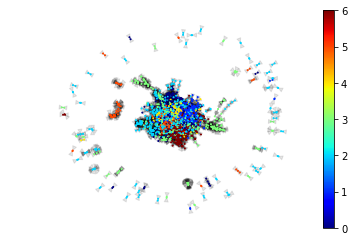

In [89]:
# colors = np.interp(result, (result.min(), result.max()), (0., 4.))
# nodes = kn.nodes()

pos = nx.spring_layout(kn)
ec = nx.draw_networkx_edges(kn, pos, alpha=0.1)
nc = nx.draw_networkx_nodes(kn, pos, nodelist=kn.nodes(), node_color=result,
                            with_labels=False, node_size=1, cmap=plt.cm.jet)

plt.colorbar(nc)
plt.axis('off')
plt.show()